In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
cars_data = pd.read_csv('cars_sampled.csv')
cars = cars_data.copy()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [3]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [4]:
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(columns=col, axis=1)

In [5]:
cars.drop_duplicates(keep='first', inplace=True)

In [6]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

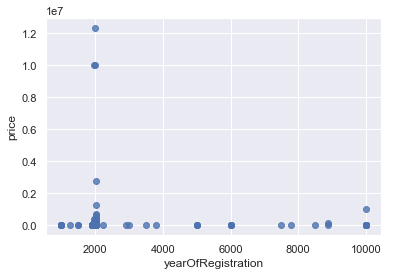

In [7]:
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1748

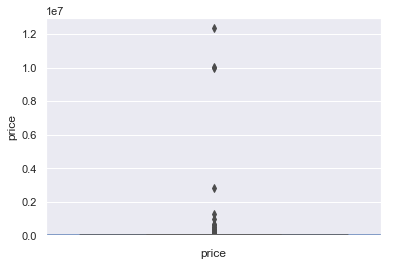

In [8]:
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)

5565

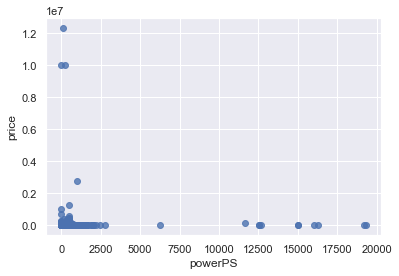

In [9]:
power_count = cars['powerPS'].value_counts().sort_index()
#sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
#sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)

In [10]:
cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

In [11]:
cars['monthOfRegistration']/=12

In [12]:
cars['Age']=(2018-cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age']=round(cars['Age'], 2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [13]:
cars=cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

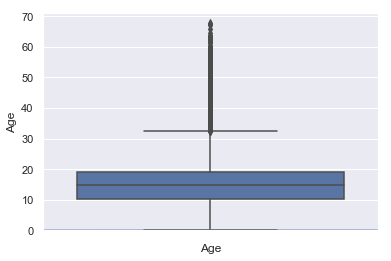

In [14]:
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

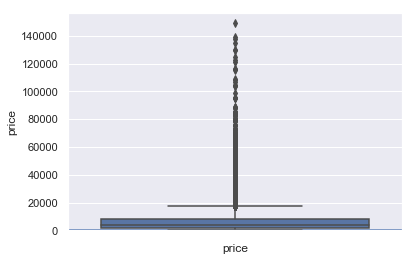

In [15]:
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

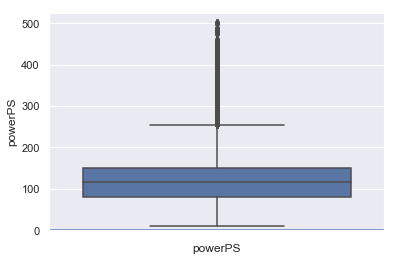

In [16]:
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['powerPS'])

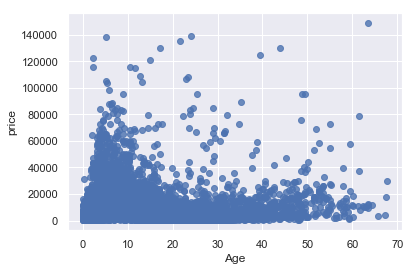

In [17]:
sns.regplot(x='Age', y='price', scatter=True, fit_reg=False, data=cars)

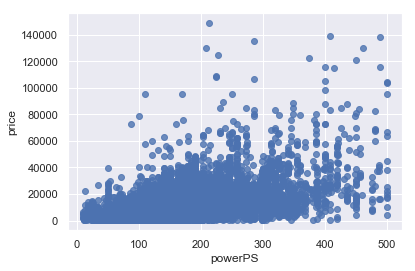

In [18]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [27]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [28]:
pd.crosstab(cars['seller'], columns='count', normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


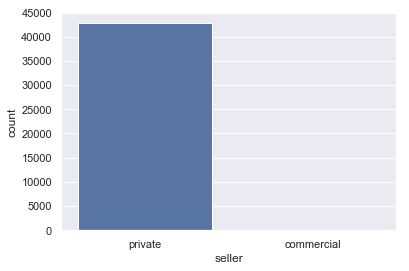

In [29]:
sns.countplot(x='seller', data=cars)

In [30]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

In [31]:
pd.crosstab(cars['offerType'], columns='count', normalize=True)

col_0,count
offerType,
offer,1


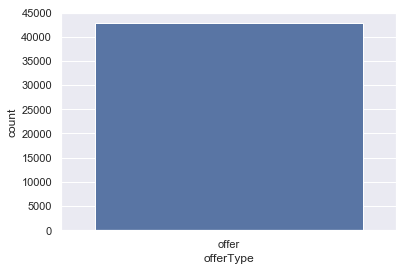

In [32]:
sns.countplot(x='offerType', data=cars)

In [33]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [34]:
pd.crosstab(cars['abtest'], columns='count', normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


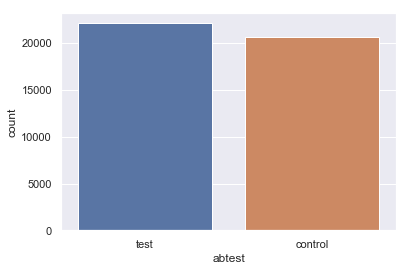

In [35]:
sns.countplot(x='abtest', data=cars)

In [36]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [37]:
pd.crosstab(cars['vehicleType'], columns='count', normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


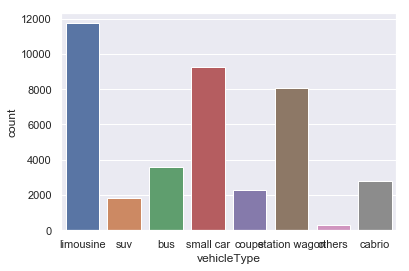

In [38]:
sns.countplot(cars['vehicleType']);

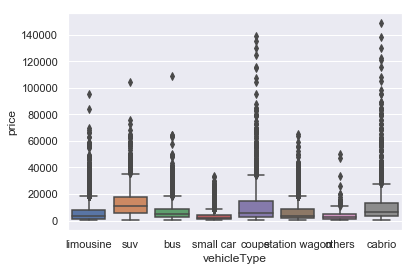

In [39]:
sns.boxplot(x='vehicleType', y='price', data=cars);

In [40]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [41]:
pd.crosstab(cars['gearbox'], columns='count', normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


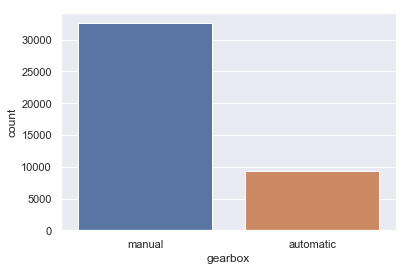

In [42]:
sns.countplot(cars['gearbox'])

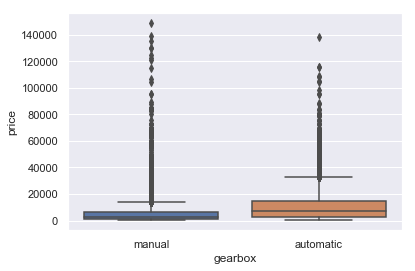

In [43]:
sns.boxplot(x='gearbox', y='price', data=cars)

In [45]:
cars['model'].value_counts()
cars['model'].describe()

count     41089
unique      247
top        golf
freq       3478
Name: model, dtype: object

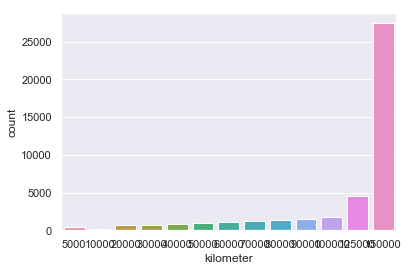

In [47]:
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'], columns='count', normalize=True)
sns.countplot(cars['kilometer'])

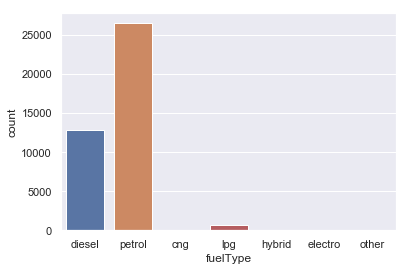

In [38]:
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'], columns='count', normalize=True)
sns.countplot(x='fuelType', data=cars)
sns.boxplot(x='fuelType', y='price', data=cars)

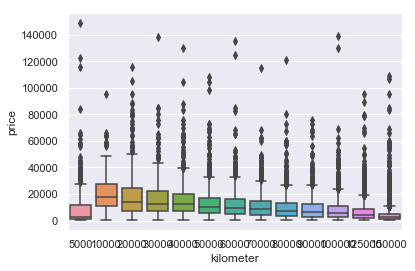

In [48]:
sns.boxplot(x='kilometer', y='price', data=cars)

In [52]:
cars['brand'].value_counts()
#pd.crosstab(cars['brand'], columns='count', normalize=True)
#sns.boxplot(x='brand', y='price', data=cars)

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

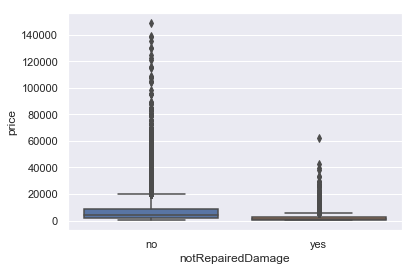

In [50]:
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'], columns='count', normalize=True)
#sns.countplot(x='notRepairedDamage', data=cars)
sns.boxplot(x='notRepairedDamage', y='price', data=cars)

In [53]:
col = ['seller','offerType','abtest']
carss = cars
cars = cars.drop(columns=col, axis=1)
cars_copy = cars.copy()

In [54]:
cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
correlation

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [55]:
round(correlation, 3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [56]:
cars_omit = cars.dropna(axis=0)
cars_omit.shape
car_omit = pd.get_dummies(cars_omit, drop_first=True)
car_omit.shape

(32884, 301)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [62]:
x1 = car_omit.drop(['price'], axis='columns', inplace=False)
y1 = car_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D500BA5F8>,
      dtype=object)

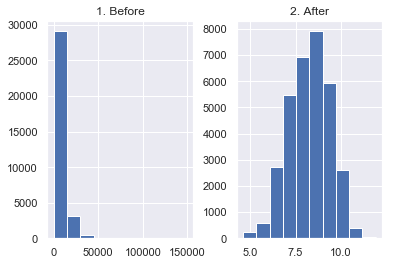

In [63]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [64]:
y1 = np.log(y1)
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [65]:
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [66]:
base_pred = np.repeat(base_pred, len(y_test))
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mean_square_error

1.1274483657478247

In [67]:
lgr = LinearRegression(fit_intercept=True)
model_lin1 = lgr.fit(X_train, y_train)
cars_prediction_lin1 = lgr.predict(X_test)

#computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_prediction_lin1)
lin_mrse1 = np.sqrt(lin_mse1)
lin_mrse1

0.5455481266513853

In [68]:
#R squared value
r2_lin_test1 = model_lin1.score(X_test, y_test)
r2_lin_train1 = model_lin1.score(X_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.7658615091649235 0.7800936978183916


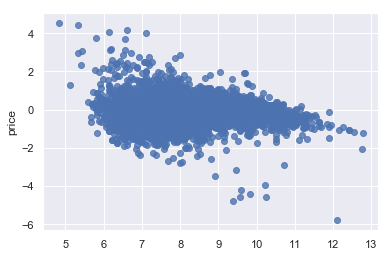

In [69]:
residuals1 = y_test - cars_prediction_lin1
sns.regplot(x=cars_prediction_lin1, y=residuals1, scatter=True, fit_reg=False)

In [70]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [71]:
#MODEL with imputed data
cars_imputed = cars.apply(lambda x:x.fillna(x.median())
                         if x.dtype == 'float' else
                         x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D50687E10>,
      dtype=object)

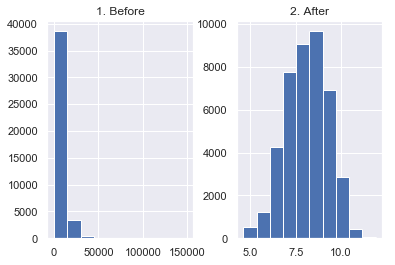

In [72]:
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [73]:
y2 = np.log(y2)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state=3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [74]:
base_pred1 = np.mean(y_test1)
print(base_pred1)

8.068391740519193


In [75]:
base_pred1 = np.repeat(base_pred1, len(y_test1))
base_root_mean_square_error1 = np.sqrt(mean_squared_error(y_test1, base_pred1))
base_root_mean_square_error1

1.1884349112889792

In [76]:
lgr2 = LinearRegression(fit_intercept=True)
model_lin2 = lgr2.fit(X_train1, y_train1)
cars_prediction_lin2 = lgr2.predict(X_test1)

#computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_prediction_lin2)
lin_mrse2 = np.sqrt(lin_mse2)
lin_mrse2

0.6483956449231295

In [77]:
#R squared value
r2_lin_test2 = model_lin2.score(X_test1, y_test1)
r2_lin_train2 = model_lin2.score(X_train1, y_train1)
print(r2_lin_test2, r2_lin_train2)

0.7023339008631185 0.7071658736894363


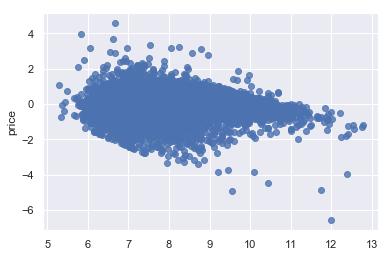

In [78]:
residuals2 = y_test1 - cars_prediction_lin2
sns.regplot(x=cars_prediction_lin2, y=residuals2, scatter=True, fit_reg=False)

In [79]:
residuals2.describe()

count   12832.000
mean       -0.024
std         0.648
min        -6.591
25%        -0.348
50%         0.043
75%         0.374
max         4.607
Name: price, dtype: float64

In [80]:
rf1 = RandomForestRegressor(n_estimators=100, max_features='auto',
                           max_depth=100, min_samples_split=10,
                           min_samples_leaf=4, random_state=1)
model_rf1 = rf1.fit(X_train, y_train)
cars_prediction_rf1 = rf1.predict(X_test)

#computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_prediction_rf1)
rf_mrse1 = np.sqrt(rf_mse1)
rf_mrse1

0.4360736289370223

In [81]:
#R Squared value
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train, y_train)
print(r2_rf_test1, r2_rf_train1)

0.8504018147750623 0.9202494705146291


In [82]:

rf2 = RandomForestRegressor(n_estimators=100, max_features='auto',
                           max_depth=100, min_samples_split=10,
                           min_samples_leaf=4, random_state=1)
model_rf2 = rf2.fit(X_train1, y_train1)
cars_prediction_rf2 = rf2.predict(X_test1)

#computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_prediction_rf2)
rf_mrse2 = np.sqrt(rf_mse2)
rf_mrse2

0.494313994408829

In [83]:
#R Squared value
r2_rf_test2 = model_rf2.score(X_test1, y_test1)
r2_rf_train2 = model_rf2.score(X_train1, y_train1)
print(r2_rf_test2, r2_rf_train2)

0.8269964521311131 0.9024289431669166
